In [ ]:
!pip install faker
!pip install num2words
!pip install wordcloud
from faker import Faker
import csv
import pandas as pd
import random
from google.colab import output
import matplotlib.pyplot as plt
from num2words import num2words 
from wordcloud import WordCloud
import numpy as np
output.clear()

In [ ]:
nome = Faker('pt_BR')
nota = []
data = []
header = ['nome','nota']
with open('notas.csv', 'w', encoding='UTF8') as f:
  writer = csv.writer(f)
  writer.writerow(header)
  for _ in range(100):
    data.append(format(nome.unique.name()))
    data.append((format(random.randint(0,10))))
    writer = csv.writer(f)
    writer.writerow(data)
    data.clear() 
del data,header,nome,writer,f,nota

In [ ]:
notas = pd.read_csv('notas.csv')
print('Amostra do CSV de notas:')
print(notas.head(5))

class Notas:
  def __init__(self):
    self.data_notas = notas['nota']
    self.notas_possiveis = []
    for i in self.data_notas.drop_duplicates():
      self.notas_possiveis.append(num2words(i, lang='pt'))

Amostra do CSV de notas:
                      nome  nota
0  Sr. João Pedro Caldeira     1
1      João Pedro Monteiro     4
2            Natália Lopes    10
3          Otávio da Cunha     2
4   Luiz Fernando Carvalho    10


In [ ]:
class Graph(Notas):
  def __init__(self):
    super().__init__()
    histogram = plt.hist(self.data_notas,color='blue')
    self.__graph= plt.ylabel('Probabilidade')
    self.__graph= plt.xlabel('Pontuações')
    self.__graph= plt.title('Hisograma das pontuações')
    self.__graph= plt.show()

In [ ]:
class Cloud(Notas):
  def __init__(self):
    super().__init__()
    self.text = format(self.notas_possiveis)
    self.text = self.text.replace("'",'')

    wordcloud = WordCloud().generate(self.text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

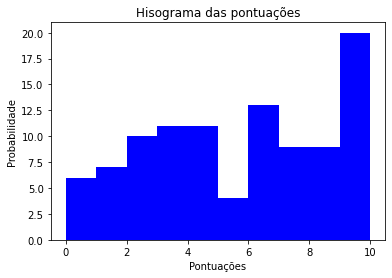

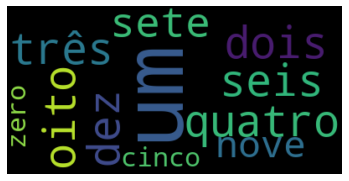

In [ ]:
Histogram = Graph()
NotasCloud = Cloud()
